## Fixed point, images, and units

In [1]:
using Pkg; Pkg.add("FixedPointNumbers")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed IntervalSets ─ v0.3.1
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [8197267c] ↑ IntervalSets v0.3.0 ⇒ v0.3.1


In [2]:
using FixedPointNumbers

FixedPointNumbers provides two kinds of fixed point.

- `Fixed{T,f}` - signed integer type T with `f` fraction bits (scaled by $2^f$)
- `Normed{T,f}` - unsigned, and scaled by $2^{f}-1$

In [3]:
typemin(Fixed{Int8,4}), typemax(Fixed{Int8,4})

(-8.0Q3f4, 7.94Q3f4)

Fixed{Int8,4}

In [6]:
typemin(Normed{UInt8,4}), typemax(Normed{UInt8,4})

(0.0N4f4, 17.0N4f4)

In [7]:
typemin(Normed{UInt8,2}), typemax(Normed{UInt8,2})

(0.0N6f2, 85.0N6f2)

In [8]:
N4f4

Normed{UInt8,4}

In [10]:
N0f8

Normed{UInt8,8}

In [11]:
reinterpret(N0f8, 0xff)

1.0N0f8

In [12]:
reinterpret(UInt8, 0.6N0f8)

0x99

## Moving between representations

In [13]:
using Pkg
Pkg.add(["AxisArrays","ImageAxes","TestImages","Unitful"])

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [14]:
using Images, AxisArrays, ImageAxes, TestImages, Unitful, Colors

┌ Info: Recompiling stale cache file /home/jeff/.julia/compiled/v1.0/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/jeff/.julia/compiled/v1.0/TestImages/cMlD2.ji for TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1187


In [15]:
a = [0.2N0f8, 0.8N0f8]

2-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.2N0f8
 0.8N0f8

In [16]:
raw = rawview(a)

2-element reinterpret(UInt8, ::Array{N0f8,1}):
 0x33
 0xcc

In [17]:
raw[2] = 0xff

0xff

In [18]:
a

2-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.2N0f8
 1.0N0f8

Images.jl can create several other kinds of "views" to access different representations:
- `colorview` for separate channel images
- `paddedview` to pad to a larger size without copying
- `StackedView` to virtually stack images

In [19]:
colorview(RGB, 0:.01:1, zeroarray, 1:-.01:0)

In [20]:
typeof(ans)

MappedArrays.MultiMappedArray{RGB{Float64},1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},ImageCore.ZeroArray{Float64,1,Base.OneTo{Int64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}},Type{RGB{Float64}},typeof(ImageCore.extractchannels)}

In [22]:
Pkg.add("ImageCore")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [a09fc81d] + ImageCore v0.7.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [23]:
using ImageCore

In [27]:
sizeof(ImageCore.ZeroArray{Float64,1,Base.OneTo{Int64}})

8

## Named axes and units

In [28]:
img = testimage("mri")

226×186×27 AxisArray{Gray{Normed{UInt8,8}},3,Array{Gray{Normed{UInt8,8}},3},Tuple{Axis{:P,StepRange{Int64,Int64}},Axis{:R,StepRange{Int64,Int64}},Axis{:S,StepRange{Int64,Int64}}}}:
[:, :, 1] =
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f

In [35]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/80f3732f709d9e935ac45e1a18c674175496e2c7-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/80f3732f709d9e935ac45e1a18c674175496e2c7-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_02", 0, Any[SyncCallback(Scope("knockout-component-60f6cd23-393b-4ffc-8720-2fc6a088d454", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>27,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_01", 14, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##3#5,Observable{Any}},Tuple{Observable{Int64}}}(##16#17{##3#5,Observable{Any}}(##3#5(), Observable{Any}("ob_03", Gray{Normed{UInt8,8}}[Gray{N0f8}(0.0) Gray{N0f8}(0.0) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.0) Gray{N0f8}(0.0) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)], Any[])), (Observable{Int64}(#= circular reference @-4 =#),))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/jeff/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/jeff/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/jeff/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/jeff/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/jeff/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"c
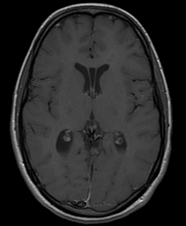
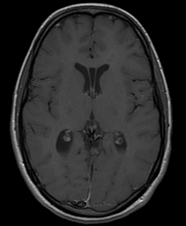

In [36]:
@manipulate for i = 1:27 
    img[Axis{:S}(i)]
end

In [37]:
using Unitful: mm, s

In [38]:
img = AxisArray(rand(256, 256, 6, 50), (:x, :y, :z, :time), (0.4mm, 0.4mm, 1mm, 2s))

256×256×6×50 AxisArray{Float64,4,Array{Float64,4},Tuple{Axis{:x,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}}}},Axis{:y,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.D

In [39]:
typeof(mm)

Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}

In [40]:
t = timeaxis(img);

In [41]:
img[t(2)]

256×256×6 AxisArray{Float64,3,Array{Float64,3},Tuple{Axis{:x,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}}}},Axis{:y,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dime

In [42]:
pixelspacing(img)

(0.4 mm, 0.4 mm, 1 mm)

In [43]:
1mm + 2mm

3 mm

In [44]:
1mm + 2mm + 3*Unitful.m

3003//1000 m

In [45]:
1mm + 1s

Unitful.DimensionError: DimensionError: 1 mm and 1 s are not dimensionally compatible.

In [46]:
@code_native 1mm+2mm

	.text
; Function + {
; Location: quantities.jl:77
; Function +; {
; Location: quantities.jl:77
	movq	(%rsi), %rax
	addq	(%rdi), %rax
;}
	retq
	nopw	(%rax,%rax)
;}


In [48]:
# indexing with a time interval
img[:,:,:,3s..5s]

256×256×6×1 AxisArray{Float64,4,Array{Float64,4},Tuple{Axis{:x,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}(-3, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)}}}}}},Axis{:y,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Length}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Meter,Unitful.Dimensions{(Unitful.Di

In [47]:
1..2 ⊆ 1..4

true

In [49]:
prod([1mm,2mm,3mm])

6 mm^3